# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Conclusion](#7)
8. [References](#8)

<a id="1"></a> 
# **Introduction**

La modelación de series de tiempo es una técnica ampliamente utilizada en la predicción y el pronóstico de variables que varían en el tiempo. En el ámbito del transporte aéreo, el pronóstico preciso del tráfico de pasajeros es de vital importancia para planificar y tomar decisiones estratégicas en aeropuertos y compañías aéreas. Un ejemplo en este contexto es el pronóstico del tráfico de pasajeros en el aeropuerto de San Francisco.

El aeropuerto de San Francisco es uno de los principales centros de transporte aéreo en los Estados Unidos y, por lo tanto, la predicción precisa del tráfico de pasajeros es esencial para optimizar la capacidad de las instalaciones, programar recursos, mejorar la gestión operativa y proporcionar una experiencia satisfactoria a los viajeros.

La modelación de series de tiempo aplicada al pronóstico del tráfico de pasajeros del aeropuerto de San Francisco permite capturar y analizar patrones y tendencias históricas en los datos de tráfico, y utilizar esta información para hacer predicciones futuras. Estos modelos tienen en cuenta la estacionalidad, las tendencias y otros factores que pueden influir en el tráfico de pasajeros, lo que los hace especialmente adecuados para este tipo de pronóstico.

Dentro de los métodos de modelación de series de tiempo, se pueden utilizar diferentes enfoques, como ARIMA (AutoRegressive Integrated Moving Average), ETS (Error-Trend-Seasonality), Theta, Naive Seasonal, entre otros. Estos modelos se ajustan a los datos históricos y generan pronósticos que pueden proporcionar una base sólida para la toma de decisiones y la planificación estratégica en el aeropuerto de San Francisco.

En este contexto, el presente análisis se centra en evaluar diferentes modelos de series de tiempo aplicados al pronóstico del tráfico de pasajeros en los vuelos domésticos e internacionales del aeropuerto de San Francisco. Se examinan métricas de evaluación como el error promedio absoluto escalado (MASE), el error absoluto medio (MAE), el error porcentual absoluto medio (MAPE), el error cuadrático medio (RMSE) y el error porcentual absoluto medio simétrico (SMAPE). Estas métricas permiten comparar y evaluar la precisión y el rendimiento de los diferentes modelos en función de su capacidad para pronosticar con precisión el tráfico de pasajeros en el aeropuerto.

El objetivo final de este análisis es identificar el modelo o enfoque de modelación de series de tiempo que mejor se ajuste a los datos del tráfico de pasajeros del aeropuerto de San Francisco, con el fin de proporcionar pronósticos más precisos y confiables que respalden la toma de decisiones informada en la gestión del aeropuerto y las operaciones aéreas.

<a id="2"></a>
# **Case study**

Caso de estudio: Modelación de series de tiempo para el pronóstico del tráfico de pasajeros en el aeropuerto de San Francisco

El pronóstico preciso del tráfico de pasajeros es esencial para la planificación y gestión eficiente de los aeropuertos. En este caso de estudio, exploraremos la aplicación de técnicas de modelación de series de tiempo para pronosticar el tráfico de pasajeros en el aeropuerto de San Francisco. Utilizaremos datos históricos de los vuelos domésticos e internacionales para desarrollar modelos y evaluar su precisión en términos de diferentes métricas de evaluación.

    1- Recopilación de datos
    2- Análisis exploratorio de datos
    3- Preparación de los datos
    4- Modelado de series de tiempo
    5- Pronóstico y validación
    6- Evaluación de los modelos
    7- Análisis y conclusiones

La modelación de series de tiempo es una herramienta poderosa para pronosticar el tráfico de pasajeros en el aeropuerto de San Francisco. Al aplicar diferentes modelos y evaluar su desempeño, podemos obtener pronósticos precisos y confiables que respalden la toma de decisiones informada en la gestión del aeropuerto y las operaciones aéreas. Este caso de estudio nos permitirá comprender mejor las características del tráfico de pasajeros en el aeropuerto de San Francisco y cómo los modelos de series de tiempo pueden contribuir a su pronóstico.

# **San Francisco Airport (SFO) traffic analysis**

San Francisco International Airport (IATA code: SFO) is located south of San Francisco downtown and it’s a major West Coast air transportation hub. It serves both domestic and international (also trans-Pacific) flights. It's equipped with 4 asphalt runways – two perpendicular pairs. This airport is one of the main hubs for the United Airline which generates relatively a big chunk of the airport's traffic. It is also worth checking [airport's annual report ](https://s3.amazonaws.com/media.flysfo.com/2017_Annual_Report.pdf) to learn more about the operational side of the airport. You can find there, for example, that only 59% of the income is from aviation operations (which is currently a quite typical share in various airports' income). The remaining part comes from concessions (retail), parking fees and transportation.

In this kernel, we will explore airport traffic statistics and we'll build some bsic forecasting models.

---
**EDA Highlights**
* Passengers traffic **steadily grows** from 2005 through 2018
* **The highest number** of passengers is reported so far is in August 2017: **5 497 000** people.
* There is a visible **peak in** the traffic during the **holiday period**
* Most of the flights are **domestic**
* Most of the flights are operated by **narrow body aircraft** (e.g. Boeing 737, Airbus 320)
* The biggest share in a traffic generation has the **United Airlines** (over 57%)
* SARIMAX model predicts that **in 2022** the airport's traffic will be between **5 and 7 million** passengers with confidence intervals between 3.5-8.5 million

## Importing Libraries

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

from statsmodels.tsa.stattools import adfuller

# Time
# ==============================================================================
from datetime import datetime, date
from datetime import timedelta
import datetime as dt # working with time data

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFDAB9',  # #212946  '#99FFDE', '#ffde99', '#de99ff' # #212946  '#99FFDE', '#ffde99', '#de99ff'  'coral','#FFDAB9','yellowgreen','#6495ED'
    'axes.facecolor': '#FFDAB9',
    'savefig.facecolor': '#FFDAB9',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': 'black',  #2A3459
    'grid.linewidth': '1',
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## Importing time series data

This is a dataset hosted by the city of San Francisco. The organization has an open data platform found here and they update their information according the amount of data that is brought in. 

In [3]:
PAX_raw = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/air-traffic-passenger-statistics.csv")
PAX = PAX_raw.copy()  # leaving the original database untouched in case it will be needed later
PAX.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [132]:
PAX.info()              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period              18885 non-null  datetime64[ns]
 1   Operating Airline            18885 non-null  object        
 2   Operating Airline IATA Code  18822 non-null  object        
 3   Published Airline            18885 non-null  object        
 4   Published Airline IATA Code  18822 non-null  object        
 5   GEO Summary                  18885 non-null  object        
 6   GEO Region                   18885 non-null  object        
 7   Activity Type Code           18885 non-null  object        
 8   Price Category Code          18885 non-null  object        
 9   Terminal                     18885 non-null  object        
 10  Boarding Area                18885 non-null  object        
 11  Passenger Count              18885 non-nu

A quick peek at these data shows that everything looks OK.

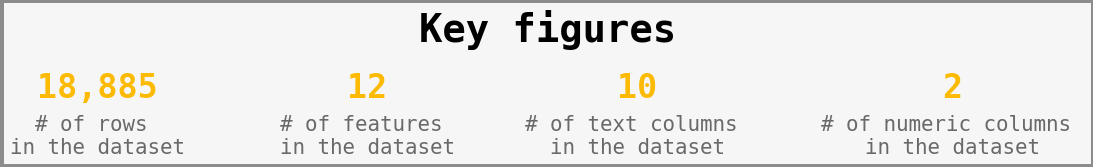

In [11]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

data = PAX_raw
art_dtypes = data.dtypes.value_counts()

fig = plt.figure(figsize=(5,2),facecolor='white')
ax0 = fig.add_subplot(1,1,1)
ax0.text(1, 0.8, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace', ha='center')

ax0.text(0, 0.4, "{:,d}".format(data.shape[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.6, 0.4, "{}".format(data.shape[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.2, 0.4, "{}".format(art_dtypes[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.2, 0.001, "# of text columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.9, 0.4,"{}".format(art_dtypes[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.9, 0.001,"# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#8c8c8c')
fig.patch.set_facecolor('#f6f6f6')
ax0.set_facecolor('#f6f6f6')
    
plt.show()

Now is the time for checking a number of missing values in each column. The table below will show **only columns with missing data**.

In [12]:
nulls = PAX.isnull().sum().to_frame().sort_values(by=0, ascending = False)
nulls.columns = ["Missing values"]
nulls[nulls['Missing values'] != 0]

,Missing values
Operating Airline IATA Code,63
Published Airline IATA Code,63


Only 2 columns contain missing information. However, these columns are not relevant for this analysis as these are just IATA Airline Codes. These are 2-letter codes and most of the airlines have such a code, e.g. British Airways has a code *BA* and Polish LOT has a code *LO*.

For better pre-processing, we will format the `Activity Period` to a *date type* and extract year and month components.

In [13]:
PAX.loc[:,"Activity Period"] = pd.to_datetime(PAX.loc[:,"Activity Period"].astype(str), format="%Y%m")
PAX.loc[:,"Year"] = PAX["Activity Period"].dt.year
PAX.loc[:,"Month"] = PAX["Activity Period"].dt.month

Checking what time range is reported.

In [14]:
time_begin = PAX.loc[:,"Activity Period"].min()
time_end = PAX.loc[:,"Activity Period"].max()
time_range = time_end-time_begin

print("First date: ", str(time_begin)[:11])
print("Last date: ", str(time_end)[:11])
print("Time range in days:", time_range.days)
print("Time range in months:", time_range/np.timedelta64(1,"M"))

First date:  2005-07-01 
Last date:  2018-06-01 
Time range in days: 4718
Time range in months: 152.19354838709677


## **Airline traffic generation**

In the beginning, it is worth looking at the overall number of passengers (PAX) at San Francisco airport over time. Keep in mind that the graph below shows PAX numbers in thousands.

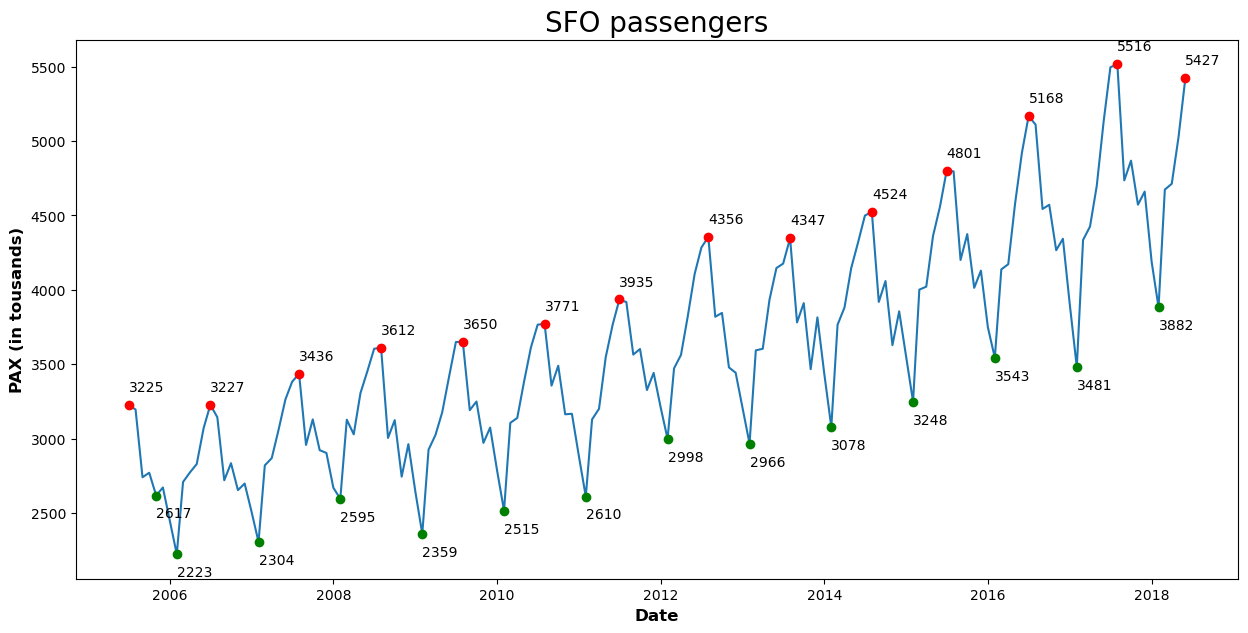

In [15]:
PAX_yr = PAX.groupby(["Activity Period"])["Passenger Count"].sum().divide(1000)

fig, ax = plt.subplots(figsize=(15,7))

#Plotting the main PAX line
sns.lineplot(x=PAX_yr.index, y=PAX_yr.values, markers=True, ax=ax,zorder=0)

# Plotting vertical lines for beginning of each year 
#years = PAX_yr.index.year.unique()
#for year in years:
#    plt.axvline(x=year, ls = "--", c = "#3f5261", alpha=0.7)
    
# Looking for maximum PAX for each year
PAX_yr_maxs = PAX_yr.groupby(PAX_yr.index.year).max()
PAX_yr_max_complete = PAX_yr[PAX_yr.isin(PAX_yr_maxs.values)].to_frame()

# Marking points of interest
plt.scatter(PAX_yr_max_complete.index, PAX_yr_max_complete.values, color = "red", zorder=2)

#Annotating each marker
for t,v in PAX_yr_max_complete.reset_index().values:
    ax.text(t,v+90,int(v))
    
# Looking for minimum PAX for each year
PAX_yr_mins = PAX_yr.groupby(PAX_yr.index.year).min()
PAX_yr_min_complete = PAX_yr[PAX_yr.isin(PAX_yr_mins.values)].to_frame()
plt.scatter(PAX_yr_min_complete.index, PAX_yr_min_complete.values, color = "green", zorder=2)
for t,v in PAX_yr_min_complete.reset_index().values:
    ax.text(t,v-150,int(v))
    
plt.title("SFO passengers", size = 20)
plt.xlabel("Date", fontweight="bold", size = 12)
plt.ylabel("PAX (in tousands)", fontweight="bold", size = 12)
plt.show()

The number of passengers is generally increasing (trend) with a clear seasonal pattern with a period of about one year. The traffic peak is around summertime while the lowest traffic is during wintertime at the beginning of the year.
The heatmap below shows what amount of traffic various airlines generated through the years (in thousands).

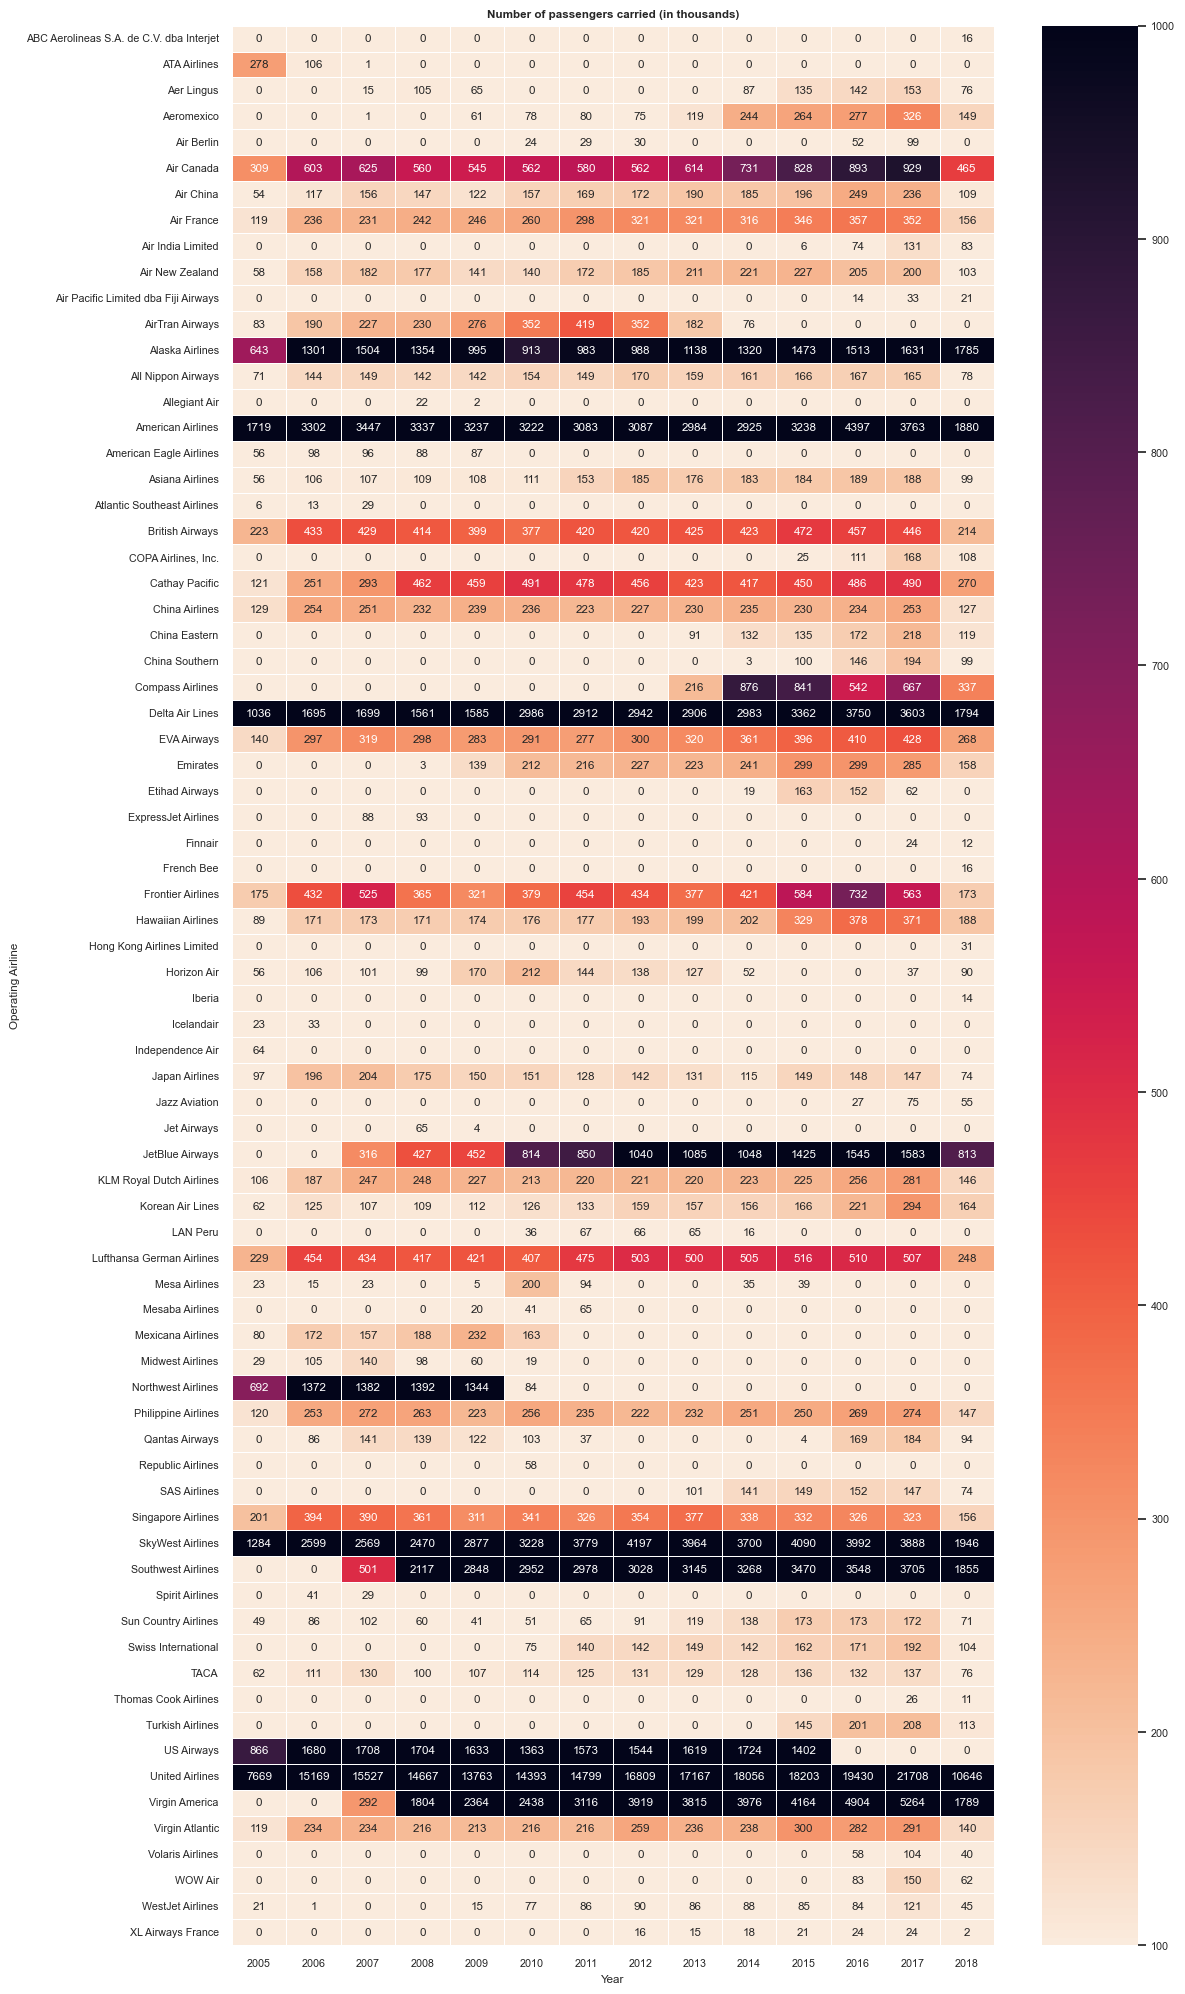

In [16]:
PAX_airline_yr = PAX.groupby(["Year","Operating Airline"])["Passenger Count"].sum().divide(1000)
PAX_airline_yr = PAX_airline_yr.reset_index()
pivot_1 = PAX_airline_yr.pivot_table(values="Passenger Count", index="Operating Airline", columns="Year", fill_value=0)
pivot_1.loc["United Airlines",:] = pivot_1.loc["United Airlines",:] + pivot_1.loc["United Airlines - Pre 07/01/2013",:]
pivot_1.drop("United Airlines - Pre 07/01/2013",axis=0, inplace=True)

#dropping the small airlines
smallest_airlines = pivot_1[pivot_1.sum(axis=1)<13]
pivot_1 = pivot_1.drop(smallest_airlines.index, axis=0)

sns.set(font_scale=0.7)
fig1 = plt.figure(figsize=(12,20))
p1 = sns.heatmap(pivot_1, annot=True, linewidths=.5, vmin=100, vmax=1000, fmt='.0f', cmap=sns.cm.rocket_r)
p1.set_title("Number of passengers carried (in thousands)", fontweight="bold")
p1.set_yticklabels(p1.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

Now let's see what airlines generate the most of the traffic. To find that we will look at the mean number of passengers per airline each year and calculate its share in the total traffic.

In [17]:
avg_airline = pivot_1.mean(axis=1)
TOP5_airlines = avg_airline.nlargest(5).to_frame().mul(1000).astype("int64")
TOP5_airlines.columns = ["Mean no. of passengers per year"]
sum_of_all = TOP5_airlines.loc[:,"Mean no. of passengers per year"].sum()
TOP5_airlines.loc[:,"Share [%]"] = TOP5_airlines.loc[:,"Mean no. of passengers per year"].div(sum_of_all).mul(100).round(1)
TOP5_airlines

,Mean no. of passengers per year,Share [%]
Operating Airline,,
United Airlines,15571737,57.5
SkyWest Airlines,3184454,11.8
American Airlines,3115884,11.5
Virgin America,2703137,10.0
Delta Air Lines,2486702,9.2


## **TOP 5 BIGGEST AIRLINES**

**1. United Airlines**

United is a huge American airline operating worldwide with strong presence in the Asia-Pacific region. It is founder of Star Alliance – international network of cooperating airlines. United has a fleet of over 760 airplanes of various types and employs over 88000 people. Its biggest hub is in Chicago O’Hare airport although San Francisco is its main West Coast hub.

**2. SkyWest Airlines**

SkyWest Airlines is an American airline operating on the regional North American market. Its flights are usually contracted by and operated under the name of other airlines. Its biggest clients are delta and United. SkyWest fleet consists mostly of regional jets (Bombardier CRJ series and Embraer 175) in number about 470. The airline ordered 100 brand new Embraer 175-E2 and 100 Mitsubishi MRJ90 jest to further expand its fleet.

**3. American Airlines**

American Airline (AA) is enormous American airline with headquarter in in Fort Worth, Texas. It has impressive fleet of over 950 airplanes and employs over 140 000 people. It is the founding member of Oneworld alliance. AA’s biggest hub is in Dallas/Fort Worth International Airport.

**4. Virgin America**

Virgin America airline was an American airline with headquarters in San Francisco operating until 2018 when it was merged with Alaska Airlines. Its business model was to operate low-fare services on the American West coast. The name was licences from UK-based Virgin Group which also controls brands of Virgin Atlantic and Virgin Australia. Its fleet consisted of 67 airplanes, mostly Airbus.

**5. Delta Airlines**

Delta Airlines is immense American airline with headquarters in Atlanta, Georgia. It is the founding member of SkyTeam airline alliance. Delta has a huge airplane fleet of 876 airplanes and employs over 86 000 people worldwide. Its main hub is in Atlanta International Airport. Historically, main milestones in term of Delta’s growth were two merges: with Western Airlines in 1987 and with Nortwest Airlines in 2009.


## **THE SMALLEST AIRLINES**

From the pure curiosity let's create a separate table the smallest airlines which operated at SFO.

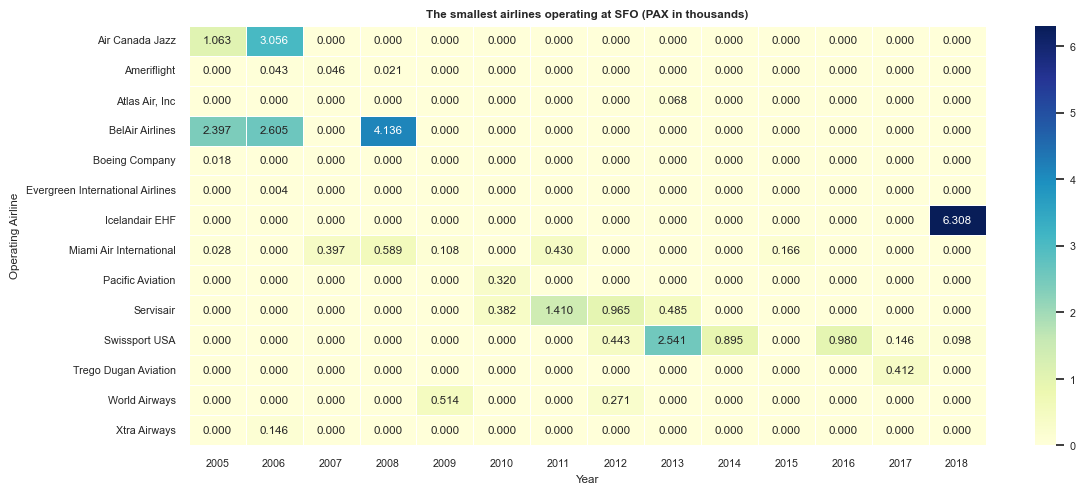

In [18]:
sns.set(font_scale=0.7)
fig2 = plt.figure(figsize=(12,5))
p2 = sns.heatmap(smallest_airlines, annot=True, linewidths=.5, cmap="YlGnBu", fmt='.3f')
p2.set_title("The smallest airlines operating at SFO (PAX in thousands)", fontweight ="bold")
p2.set_yticklabels(p2.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

Indeed, the smallest airlines operating at SFO do not generate much of a traffic and in some years no traffic at all. The "airways" themselves are not always the real airways, e.g. the Boeing Company.

## **Passanger traffic overview**

Below there is a heatmap showing the number of passengers in each month for years 2005-2018 (in thousands). We can see a peak in traffic around June-August. The highest number reported so far is in August 2017: 5 497 000 passengers. Such a peak makes sense as this is a typical holiday period.

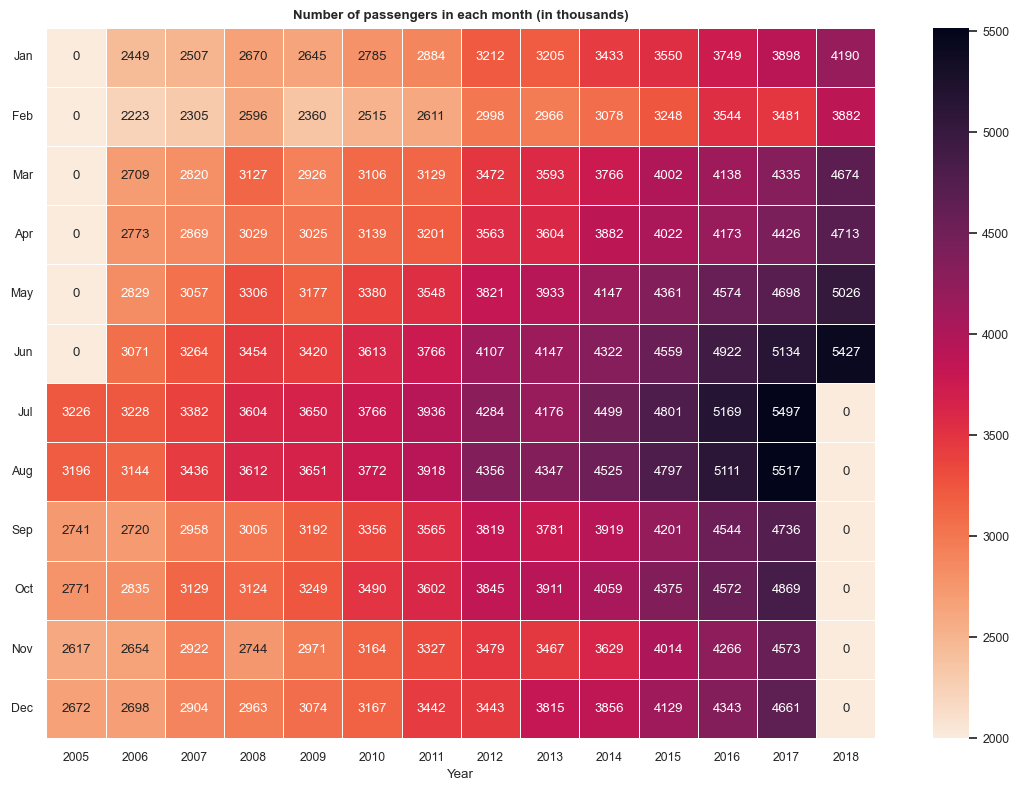

In [19]:
PAX_month_yr = PAX.groupby(["Year","Month"])["Passenger Count"].sum().divide(1000).round()
PAX_month_yr = PAX_month_yr.reset_index()

pivot_2 = PAX_month_yr.pivot_table(values="Passenger Count",index="Month",columns="Year", fill_value=0)
pivot_2.index=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

sns.set(font_scale=0.8)
fig = plt.figure(figsize=(12,8))
g = sns.heatmap(pivot_2, annot=True, linewidths=.5, fmt="d", square =True, vmin=2000, cmap=sns.cm.rocket_r)
g.set_title("Number of passengers in each month (in thousands)", fontweight="bold")
g.set_yticklabels(g.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

The line plot below shows the share of traffic being generated by each geographic region (excluding North America). The biggest share have Asia and Europe.

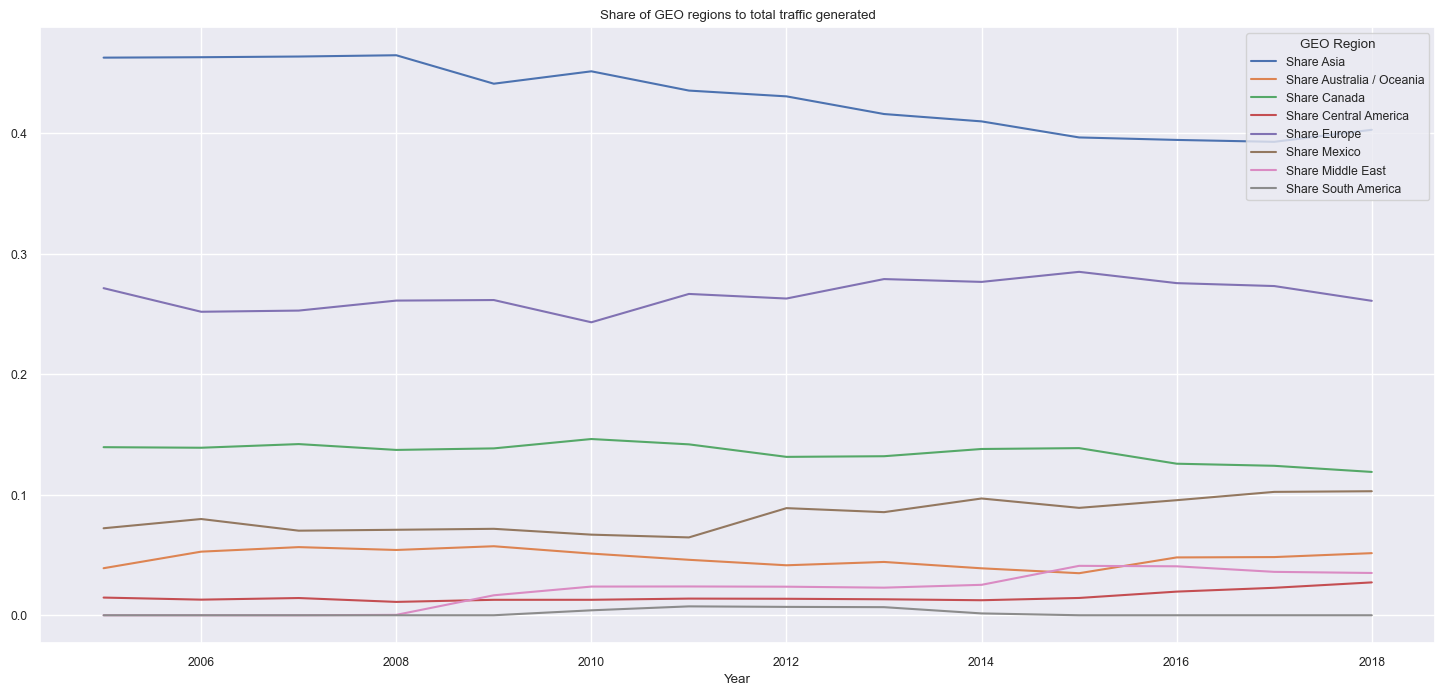

In [20]:
bbb = PAX.groupby(["Year","GEO Region"])["Passenger Count"].sum()
bbb = bbb.reset_index()

pivot_5 = bbb.pivot_table(values="Passenger Count",index="Year",columns="GEO Region", fill_value=0)
pivot_5 = pivot_5.drop("US",axis=1)
pivot_5["Total"] = pivot_5.sum(axis=1)

for col in pivot_5.columns[:-1]:
        pivot_5["Share " + str(col)]=pivot_5[col]/pivot_5["Total"]

ratios_5 = pivot_5.iloc[:,-8:]
ratios_5.plot(figsize=(18,8), title="Share of GEO regions to total traffic generated")
plt.show()

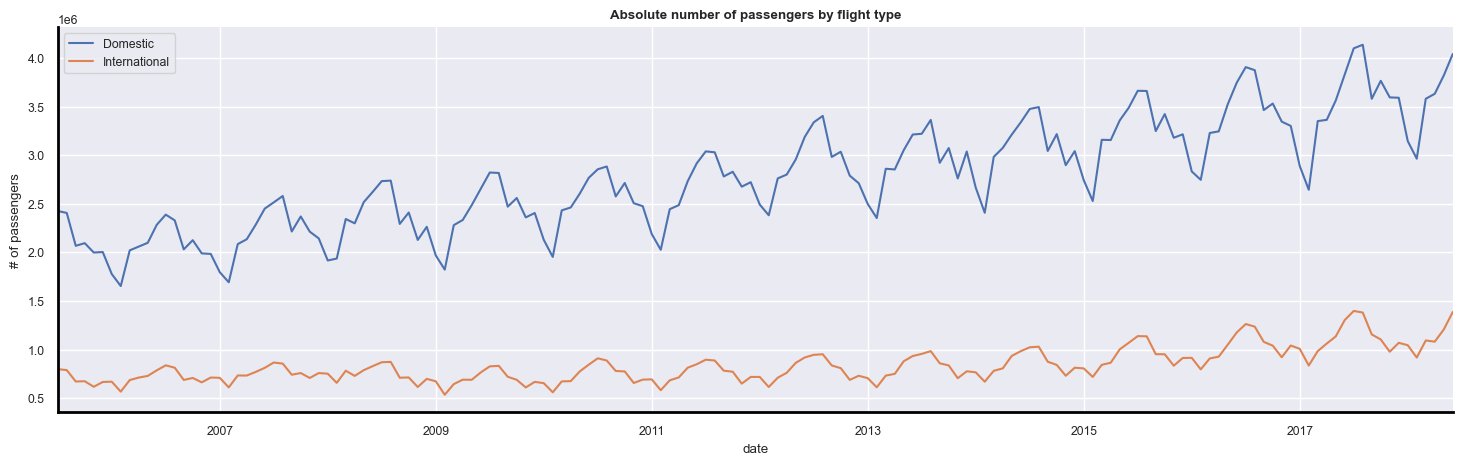

In [21]:
TS2 = PAX[PAX["GEO Summary"]=="Domestic"].groupby("Activity Period")["Passenger Count"].sum()
TS3 = PAX[PAX["GEO Summary"]=="International"].groupby("Activity Period")["Passenger Count"].sum()
TS = pd.concat([TS2,TS3],axis=1)
TS.columns=["Domestic","International"]

ax = TS.plot(figsize=(18,5))
ax.set_title("Absolute number of passengers by flight type", fontweight="bold")
ax.set_xlabel('date')
ax.set_ylabel('# of passengers')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

<a id="4"></a>
# **Split the data into training and testing**

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 daily.

In [22]:
TS.reset_index(inplace=True)

In [23]:
df1=pd.melt(TS, id_vars='Activity Period', value_vars=['Domestic', 'International',], var_name='Subject', value_name='score').sort_values(["Activity Period"])
df1=df1.rename(columns={"Activity Period":"ds", "Subject": "unique_id", "score":"y"}).reset_index(drop=True)
df1.head(10)

,ds,unique_id,y
0,2005-07-01,Domestic,2425902
1,2005-07-01,International,799867
2,2005-08-01,International,789962
3,2005-08-01,Domestic,2405904
4,2005-09-01,Domestic,2067923
5,2005-09-01,International,672630
6,2005-10-01,Domestic,2095119
7,2005-10-01,International,675596
8,2005-11-01,Domestic,1998879
9,2005-11-01,International,618454


In [110]:
train = df1[df1.ds<='2017-06-01'] 
test=df1[(df1['ds'] > '2017-06-01')]

train.shape, test.shape

((288, 3), (24, 3))

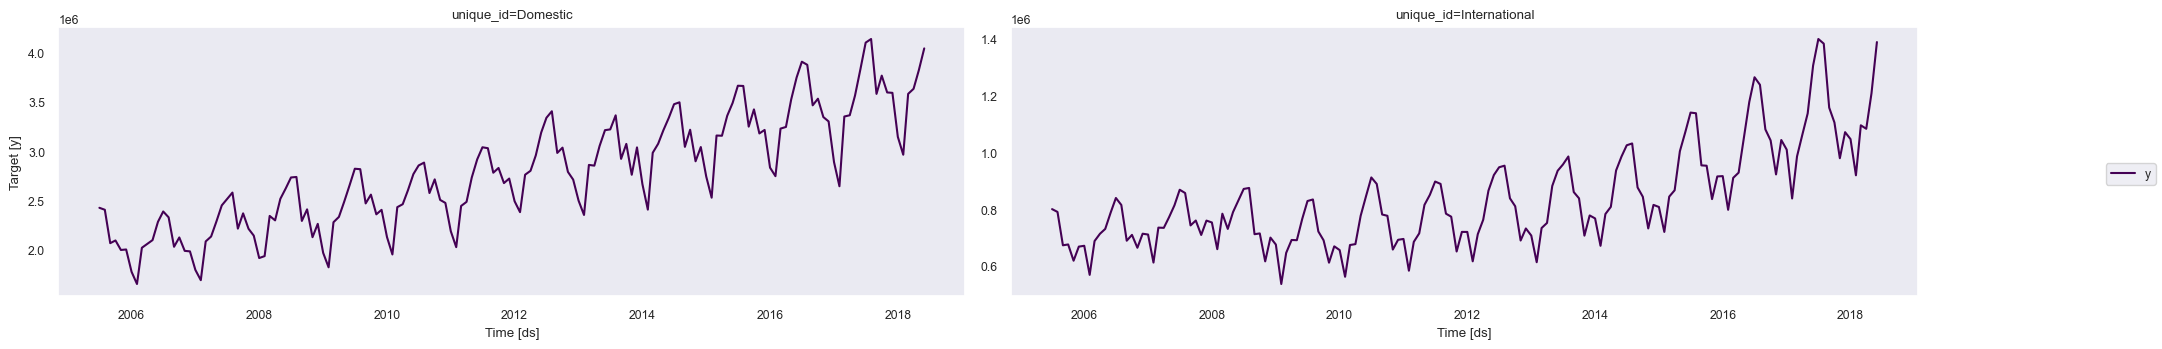

In [111]:
plot_series(train, test)

<a id="5"></a>
# **Implementation with StatsForecast**

We are going to train the `AutoARIMA, MSTL` model, using the `AutoARIMA, MSTL` function. This model will help us forecast user demand in the next 12 monthly.

In [112]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA,  SeasonalNaive,  MSTL, AutoETS,AutoCES, AutoTheta, SeasonalExponentialSmoothingOptimized,Holt, HoltWinters

In [113]:
season_length = 12 # monthly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          AutoETS(season_length=season_length),
          AutoCES(season_length=season_length),
          AutoTheta(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          SeasonalExponentialSmoothingOptimized(season_length=season_length),
          HoltWinters(season_length=season_length, error_type='A', alias='Hws_add'),
          HoltWinters(season_length=season_length, error_type='M', alias='Hws_mul'),
          Holt(season_length=season_length, error_type="A", alias="Holt_Add"),
          Holt(season_length=season_length, error_type="M", alias="Holt_Multi"),
          MSTL(
              season_length=[12], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() )# model used to forecast trend
          ]

In [114]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='MS', 
    n_jobs=-1)

## **Fit the Model**

In [115]:
sf.fit()

StatsForecast(models=[AutoARIMA,AutoETS,CES,AutoTheta,SeasonalNaive,SeasESOpt,Hws_add,Hws_mul,Holt_Add,Holt_Multi,MSTL])

## **Predict Method**

In [1]:
Y_hat = sf.predict(h=12)

Y_hat

NameError: name 'sf' is not defined

## **Forecasting Plot**

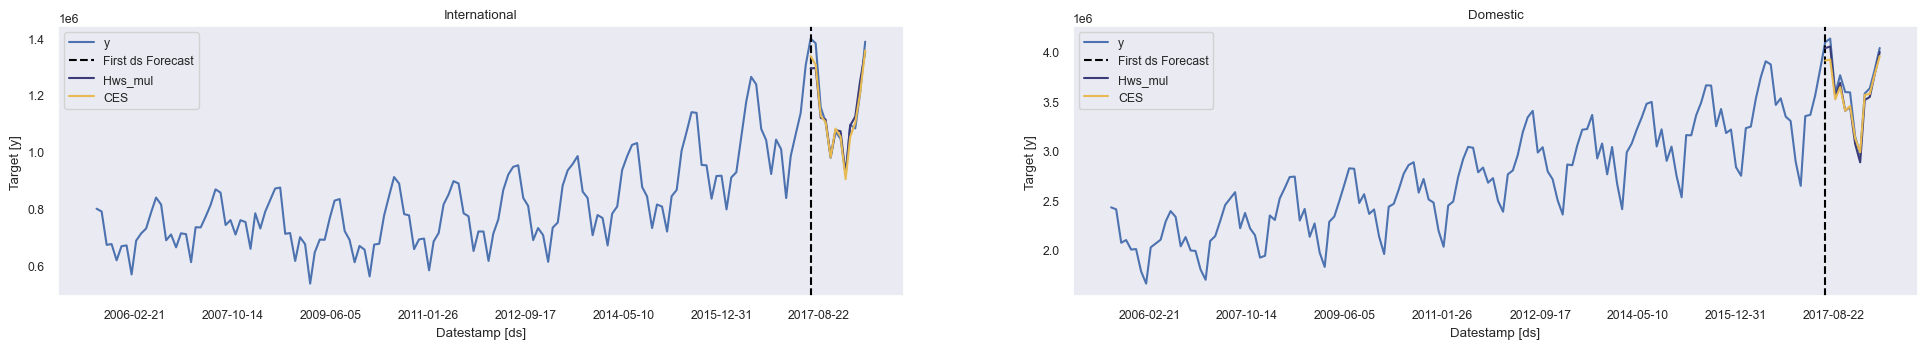

In [131]:
StatsForecast.plot(df1, Y_hat, max_insample_length=200,models=['Hws_mul',"CES"])

<a id="6"></a>
# **Evaluate the model**

In [118]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [119]:
hat=pd.merge(Y_hat,test, how='left', on=['ds'])
#Y_hat.reset_index()

In [120]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [121]:
hat_international=Y_hat.query("unique_id == 'International'")
hat_domestic=Y_hat.query("unique_id == 'Domestic'")

In [122]:
test_domestic=test.query("unique_id == 'Domestic'")
test_international=test.query("unique_id == 'International'")

train_domestic=train.query("unique_id == 'Domestic'")
train_international=train.query("unique_id == 'International'")

In [130]:
print("domestic flights")
print(evaluate_performace(train_domestic , test_domestic ,
                          hat_domestic ,models=['AutoARIMA', 'AutoETS', 'CES', 'AutoTheta', 'SeasonalNaive', 'Hws_add', 'Hws_mul', ]))
print("===="*19)
print("International flights")
print(evaluate_performace(train_international , test_international ,
                          hat_international , models=['AutoARIMA', 'AutoETS', 'CES', 'AutoTheta', 'SeasonalNaive','Hws_add', 'Hws_mul', ]))

domestic flights
                   mase            mae      mape           rmse     smape
AutoARIMA      0.879600  224064.166667  6.253625  231715.801064  6.479012
AutoETS        0.849856  216487.500000  5.903985  221408.153992  6.090248
CES            0.372300   94837.500000  2.497373  117151.196939  2.544172
AutoTheta      0.671219  170982.541667  4.707095  175616.183760  4.828008
SeasonalNaive  0.942859  240178.500000  6.675023  245196.868608  6.923850
Hws_add        0.851378  216874.958333  5.780955  230213.769945  5.970307
Hws_mul        0.320545   81653.729167  2.269423   92213.024068  2.303339
International flights
                   mase           mae      mape          rmse     smape
AutoARIMA      0.585394  47566.442708  4.336181  52840.618218  4.225820
AutoETS        0.559627  45472.750000  3.796845  53583.263314  3.893456
CES            0.304554  24746.645833  2.005881  34194.557742  2.037456
AutoTheta      0.351684  28576.250000  2.434899  33046.805726  2.423905
SeasonalN

<a id="7"></a>
# **Conclusion**

Basándonos en los resultados proporcionados para el pronóstico del tráfico de pasajeros en los vuelos domésticos del aeropuerto de San Francisco, así como en los vuelos internacionales, podemos realizar el siguiente análisis comparativo:

Vuelos domésticos:
- El modelo CES tiene el valor más bajo de MASE, lo que indica un rendimiento relativamente mejor en términos de precisión en comparación con otros modelos.
- El modelo CES también tiene los valores más bajos de MAE, MAPE, RMSE y SMAPE. Esto sugiere que el modelo CES tiene un menor error absoluto medio, un menor porcentaje de error promedio, un menor error cuadrático medio y un menor porcentaje de error simétrico en comparación con otros modelos. En general, esto indica que el modelo CES tiene el mejor rendimiento en términos de precisión en el pronóstico del tráfico de pasajeros en vuelos domésticos.

Vuelos internacionales:
- Al igual que en los vuelos domésticos, el modelo CES tiene el valor más bajo de MASE, lo que indica un rendimiento relativamente mejor en comparación con otros modelos.
- Al igual que en los vuelos domésticos, el modelo CES tiene los valores más bajos de MAE, MAPE, RMSE y SMAPE. Esto sugiere que el modelo CES tiene un menor error absoluto medio, un menor porcentaje de error promedio, un menor error cuadrático medio y un menor porcentaje de error simétrico en comparación con otros modelos. En general, esto indica que el modelo CES tiene el mejor rendimiento en términos de precisión en el pronóstico del tráfico de pasajeros en vuelos internacionales.

En resumen, el modelo CES muestra un rendimiento consistente y sobresaliente tanto en los vuelos domésticos como en los vuelos internacionales del aeropuerto de San Francisco. Este modelo puede ser considerado como una opción sólida para pronosticar el tráfico de pasajeros en ambos casos. Sin embargo, es importante tener en cuenta que el análisis del pronóstico puede verse afectado por varios factores y que estas métricas proporcionan solo una perspectiva general. Se recomienda realizar un análisis más exhaustivo y considerar otras métricas y factores relevantes antes de tomar decisiones finales.

<a id="8"></a>
# **References**

1. [Arima Model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Automatic Forecasting](https://nixtla.github.io/statsforecast/src/core/models.html)
4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)